In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-data/cardata.csv


In [2]:
df = pd.read_csv('/kaggle/input/car-data/cardata.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
10,alto 800,2017,2.85,3.60,2135,Petrol,Dealer,Manual,0
125,Royal Enfield Classic 500,2009,0.90,1.75,40000,Petrol,Individual,Manual,0
114,Royal Enfield Classic 350,2015,1.15,1.47,17000,Petrol,Individual,Manual,0
158,Honda Dream Yuga,2017,0.48,0.54,8600,Petrol,Individual,Manual,0
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df["Car_Name"].nunique()

98

In [6]:
unique_values = df['Car_Name'].unique()
unique_values

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [7]:
df.shape

(301, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Car_Name"] = encoder.fit_transform(df["Car_Name"])
df["Year"] = encoder.fit_transform(df["Year"])
df["Fuel_Type"] = encoder.fit_transform(df["Fuel_Type"])
df["Seller_Type"] = encoder.fit_transform(df["Seller_Type"])
df["Transmission"] = encoder.fit_transform(df["Transmission"])

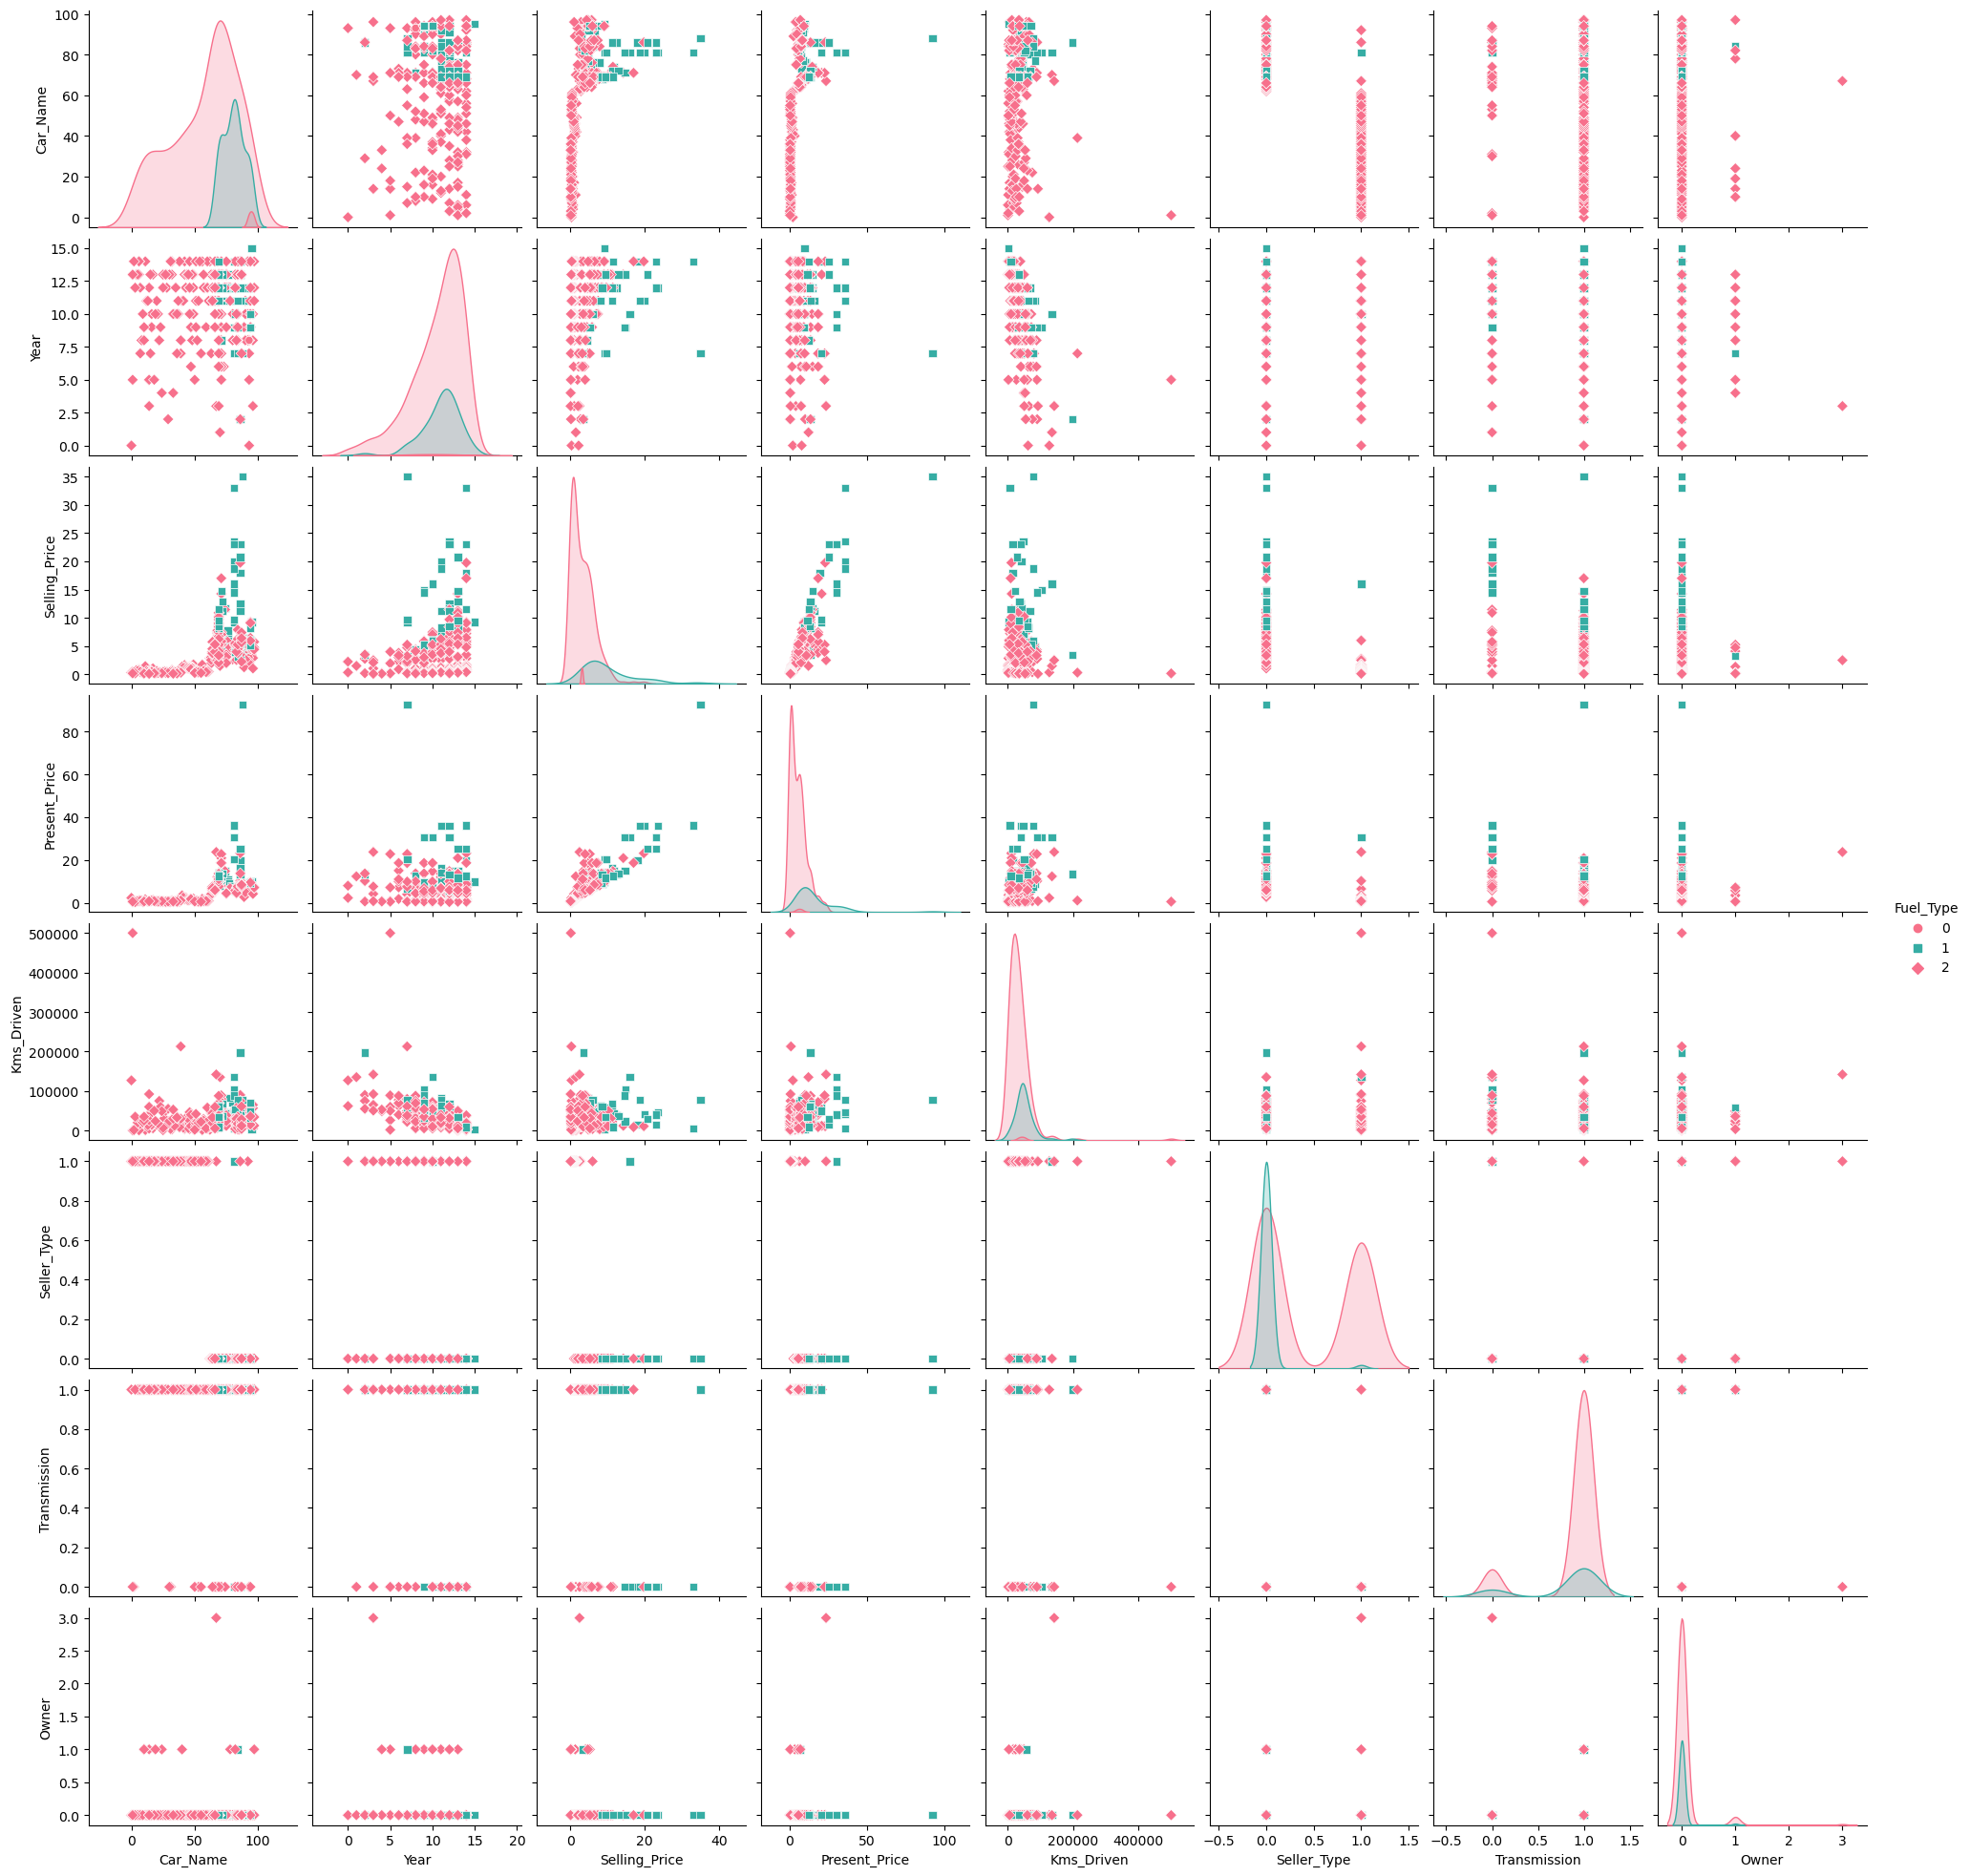

In [11]:
sns.pairplot(data=df, hue="Fuel_Type", markers=["o", "s", "D"], height=2.5, palette="husl")

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

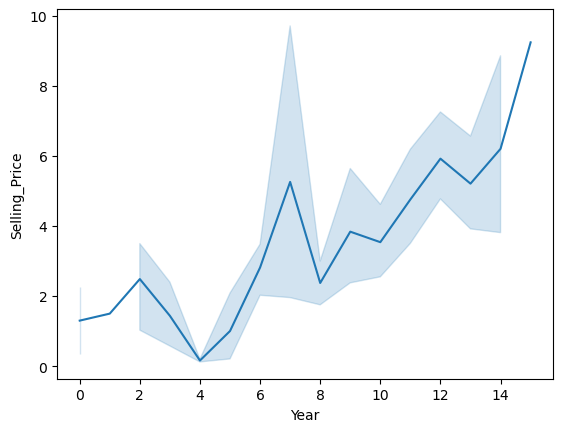

In [12]:
sns.lineplot(x="Year",y="Selling_Price",data=df)

In [13]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,11,3.35,5.59,27000,2,0,1,0
1,93,10,4.75,9.54,43000,1,0,1,0
2,68,14,7.25,9.85,6900,2,0,1,0
3,96,8,2.85,4.15,5200,2,0,1,0
4,92,11,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,13,9.50,11.60,33988,1,0,1,0
297,66,12,4.00,5.90,60000,2,0,1,0
298,69,6,3.35,11.00,87934,2,0,1,0
299,69,14,11.50,12.50,9000,1,0,1,0


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["Kms_Driven"] = scaler.fit_transform(df[["Kms_Driven"]])

In [15]:
corr_matrix = df.corr()
corr_matrix

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.000000,0.017265,0.499198,0.475539,0.064453,-0.371446,-0.829718,-0.059855,-0.081192
Year,0.017265,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.499198,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,0.475539,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,0.064453,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,-0.371446,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type,-0.829718,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,-0.059855,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.081192,-0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


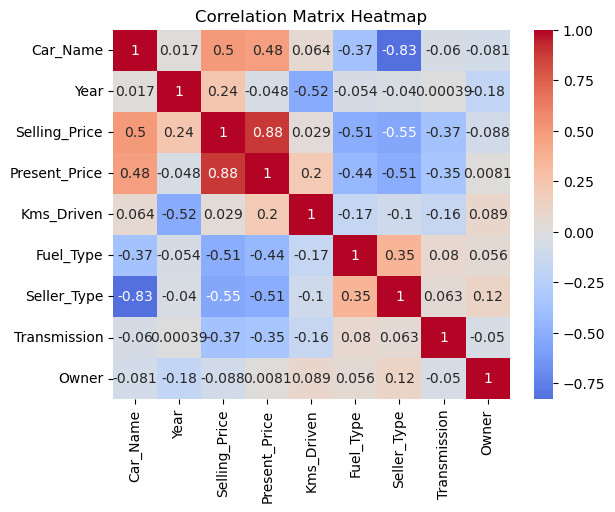

In [16]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [17]:
corr_matrix = df.corr()[["Selling_Price"]]

# Sort the correlations in descending order
corr_matrix_sorted = corr_matrix.sort_values(by="Selling_Price", ascending=False)

# Print the sorted correlation matrix
print(corr_matrix_sorted)

               Selling_Price
Selling_Price       1.000000
Present_Price       0.878983
Car_Name            0.499198
Year                0.236141
Kms_Driven          0.029187
Owner              -0.088344
Transmission       -0.367128
Fuel_Type          -0.509467
Seller_Type        -0.550724


In [18]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
X=df.drop(columns="Selling_Price")
y=df.Selling_Price
clf.fit(X,y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=X.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
Present_Price,0.874871
Year,0.078950
Kms_Driven,0.021821
Car_Name,0.015364
Transmission,0.003456
Fuel_Type,0.002598
Seller_Type,0.002369
Owner,0.000570


In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=33,test_size=0.2)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(301, 8)
(240, 8)
(61, 8)


In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
models = [("Linear Regression", LinearRegression()),
          ("Ridge Regression", Ridge()),
          ("Lasso Regression", Lasso()),
          ("ElasticNet Regression", ElasticNet()),
          ("Decision Tree Regression", DecisionTreeRegressor(random_state=42)),
          ("Random Forest Regression", RandomForestRegressor(n_estimators=100, random_state=42))]

results = []
for name, model in models:
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_rmse = mean_squared_error(y_test, test_pred, squared=False)
    results.append((name, train_r2, train_rmse, test_r2, test_rmse))
results_df = pd.DataFrame(results, columns=["Model", "Train R^2", "Train RMSE", "Test R^2", "Test RMSE"])
print(results_df)

                      Model  Train R^2    Train RMSE  Test R^2  Test RMSE
0         Linear Regression   0.885226  1.807010e+00  0.771635   1.855508
1          Ridge Regression   0.885051  1.808384e+00  0.774095   1.845487
2          Lasso Regression   0.852365  2.049431e+00  0.841990   1.543443
3     ElasticNet Regression   0.854925  2.031583e+00  0.845460   1.526405
4  Decision Tree Regression   1.000000  3.103168e-18  0.744538   1.962508
5  Random Forest Regression   0.989351  5.504086e-01  0.864691   1.428273


<function matplotlib.pyplot.show(close=None, block=None)>

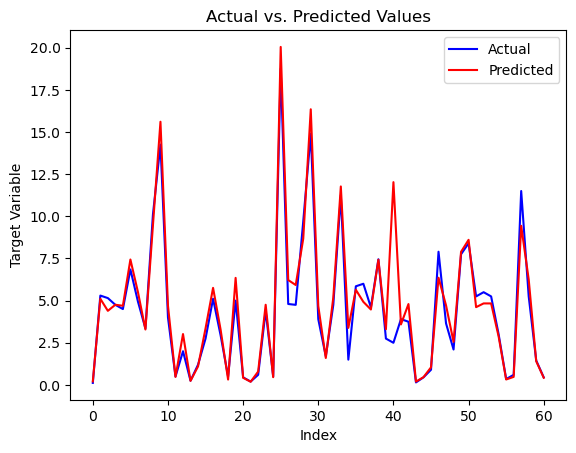

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and test_pred are already defined

# Create a range of indices for the x-axis
x_indices = np.arange(len(y_test))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the actual test values as a blue line
ax.plot(x_indices, y_test, 'b-', label='Actual')

# Plot the predicted test values as a red line
ax.plot(x_indices, test_pred, 'r-', label='Predicted')

# Set the axis labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Target Variable')
ax.set_title('Actual vs. Predicted Values')

# Add a legend
ax.legend()

# Show the plot
plt.show